## pd.DataFrame.shift() function

In [16]:
import pandas as pd
import numpy as np
df = pd.DataFrame({"Col1": [10, 20, 15, 30, 45],
                   "Col2": [13, 23, 18, 33, 48],
                   "Col3": [17, 27, 22, 37, 52]}, index=pd.date_range("2020-01-01", "2020-01-05"))

In [17]:
df

,Col1,Col2,Col3
2020-01-01,10,13,17
2020-01-02,20,23,27
2020-01-03,15,18,22
2020-01-04,30,33,37
2020-01-05,45,48,52


## Log-Returns

In [37]:
logrets = np.log(df / df.shift())
logrets

,Col1,Col2,Col3
2020-01-01,NaN,NaN,NaN
2020-01-02,0.693147,0.570545,0.462624
2020-01-03,-0.287682,-0.245122,-0.204794
2020-01-04,0.693147,0.606136,0.519875
2020-01-05,0.405465,0.374693,0.340326


In [35]:
np.exp(logrets.sum()) * df.head(1)

,Col1,Col2,Col3
2020-01-01,45.0,48.0,52.0


## Rolling Windows

In [63]:
def logreturns(s: pd.Series):
    fst, *_, lst = s
    return np.log(lst / fst)

df.rolling(window=2).agg(logreturns)

,Col1,Col2,Col3
2020-01-01,NaN,NaN,NaN
2020-01-02,0.693147,0.570545,0.462624
2020-01-03,-0.287682,-0.245122,-0.204794
2020-01-04,0.693147,0.606136,0.519875
2020-01-05,0.405465,0.374693,0.340326


## Visualizations

In [83]:
two_cols = logrets[["Col1", "Col2"]].dropna()
two_cols

,Col1,Col2
2020-01-02,0.693147,0.570545
2020-01-03,-0.287682,-0.245122
2020-01-04,0.693147,0.606136
2020-01-05,0.405465,0.374693


array([<Axes: >, <Axes: >], dtype=object)

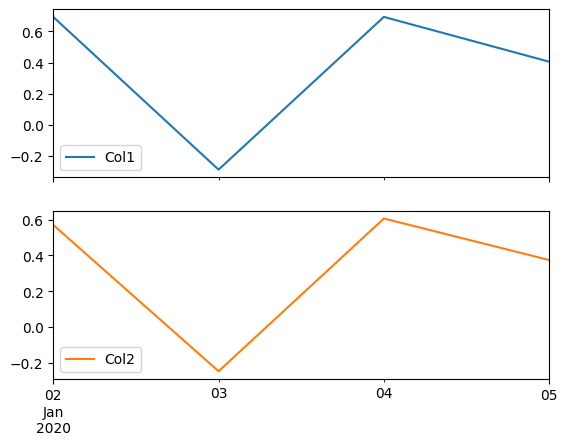

In [84]:
two_cols.plot(subplots=True)

array([[<Axes: xlabel='Col1', ylabel='Col1'>,
        <Axes: xlabel='Col2', ylabel='Col1'>],
       [<Axes: xlabel='Col1', ylabel='Col2'>,
        <Axes: xlabel='Col2', ylabel='Col2'>]], dtype=object)

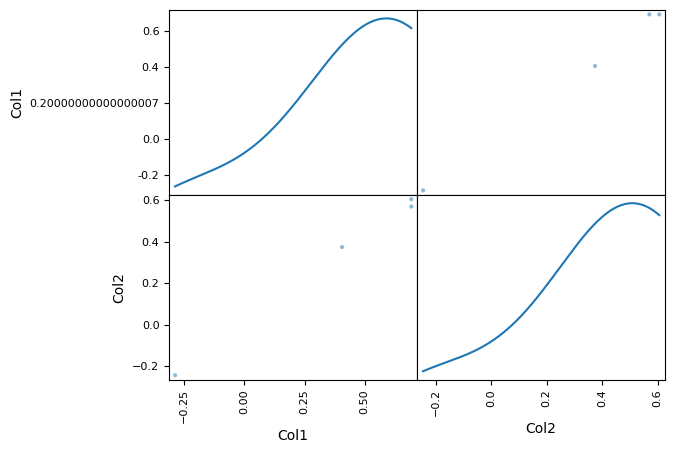

In [85]:
pd.plotting.scatter_matrix(two_cols, diagonal="kde")

## Least Squares Regression

In [86]:
two_cols["Col1"]

2020-01-02    0.693147
2020-01-03   -0.287682
2020-01-04    0.693147
2020-01-05    0.405465
Freq: D, Name: Col1, dtype: float64

In [89]:
fit = np.polyfit(two_cols["Col1"], two_cols["Col2"], deg=1)

In [94]:
np.polyval([0, 2, 0], [0, 1, 2])

array([0, 2, 4])